In [1]:
#all imports, library setups here
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import sklearn as sk
import sklearn.cluster as cluster
from sklearn import linear_model, decomposition
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize==True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    cm = np.round(cm, 2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
# load cleaned data
dtypespec = {"weeks": object, "peak": object, "var9": object, "var10": object, "var11": object, "var12": object, "var13": object}
billboardDF = pd.read_csv('billboardDF.csv',sep=",",header='infer', dtype=dtypespec)
evolutionDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
uniqueTracksDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
musicDF = pd.read_csv('musicDF.csv',sep=",",header='infer')
musicSubset = pd.read_csv('musicSubset.csv',sep=",",header='infer')
clusterDF = musicSubset.ix[:, 12:28].copy()

In [4]:
# partition into testing and training
trainingX, testingX, trainingYear, testingYear = train_test_split(clusterDF, musicSubset['year'], test_size=0.20, random_state=42)
trainingX, testingX, trainingDecade, testingDecade = train_test_split(clusterDF, musicSubset['decade'], test_size=0.20, random_state=42)
trainingX, testingX, trainingPeak, testingPeak = train_test_split(clusterDF, musicSubset['max_rank'], test_size=0.20, random_state=42)
trainingX, testingX, trainingWeeks, testingWeeks = train_test_split(clusterDF, musicSubset['weeks'], test_size=0.20, random_state=42)


0.214552188446
1960.0
2000.0
Normalized confusion matrix
[[ 0.01639344  0.27868852  0.61330762  0.08678881  0.0048216 ]
 [ 0.00795756  0.16843501  0.65251989  0.16312997  0.00795756]
 [ 0.00179533  0.0556553   0.61041293  0.30879713  0.02333932]
 [ 0.00609756  0.04471545  0.39837398  0.4004065   0.1504065 ]
 [ 0.          0.02763385  0.48704663  0.38687392  0.0984456 ]]


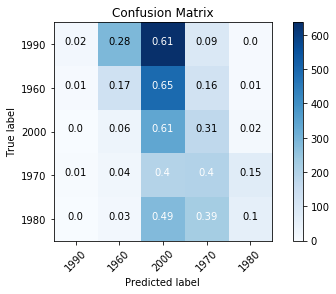

In [5]:
regr = linear_model.LinearRegression()
res = regr.fit(trainingX, trainingDecade)
print(regr.score(testingX, testingDecade))
yHat = regr.predict(testingX)
#conmat = sk.metrics.confusion_matrix(testingDecade, yHat)
yHat = yHat - (yHat % 10) + 10
print(min(yHat))
print(max(yHat))
testingDecade = testingDecade.as_matrix()
conmat = sk.metrics.confusion_matrix(testingDecade, yHat)

plt.figure()
plot_confusion_matrix(conmat, classes=set(testingDecade), normalize=True,
                      title='Confusion Matrix')

plt.show()

Normalized confusion matrix
[[ 0.70588235  0.11764706  0.0954677   0.0144648   0.06653809]
 [ 0.46286472  0.28779841  0.10875332  0.04907162  0.09151194]
 [ 0.26211849  0.22262118  0.36983842  0.07719928  0.06822262]
 [ 0.22154472  0.13211382  0.20934959  0.21341463  0.22357724]
 [ 0.26597582  0.16062176  0.16407599  0.06735751  0.34196891]]


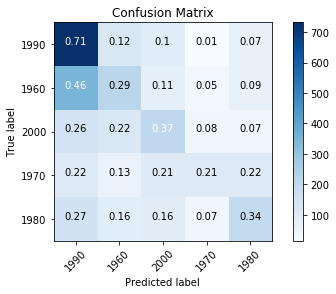

In [10]:
X = clusterDF
Y = musicSubset['decade']
c = 1e5
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20, random_state=42)
fit_mn_logreg = linear_model.LogisticRegression(C=c, multi_class = 'multinomial', solver='newton-cg')
fit_mn_logreg.fit(Xtrain, Ytrain)
Yhat_mn = fit_mn_logreg.predict(Xtest)
multinomial_conmat = sk.metrics.confusion_matrix(Ytest, Yhat_mn)

plt.figure()
plot_confusion_matrix(multinomial_conmat, classes=set(Yhat_mn), normalize=True,
                      title='Confusion Matrix')

plt.show()

In [6]:
pca = sk.decomposition.PCA(n_components = 2)
pca.fit(clusterDF)
clusterPCA = pca.transform(clusterDF)
trainingXpca, testingXpca, trainingYear, testingYear = train_test_split(clusterPCA, musicSubset['year'], test_size=0.20, random_state=42)
trainingXpca, testingXpca, trainingDecade, testingDecade = train_test_split(clusterPCA, musicSubset['decade'], test_size=0.20, random_state=42)
trainingXpca, testingXpca, trainingPeak, testingPeak = train_test_split(clusterPCA, musicSubset['max_rank'], test_size=0.20, random_state=42)
trainingXpca, testingXpca, trainingWeeks, testingWeeks = train_test_split(clusterPCA, musicSubset['weeks'], test_size=0.20, random_state=42)
regr = linear_model.LinearRegression()
res = regr.fit(trainingXpca, trainingDecade)
print(regr.score(testingXpca, testingDecade))

0.0816591861738


In [7]:
type(conmat)
type(testingDecade)

numpy.ndarray